In [82]:
# 匯入模組
import csv,re,os,nltk,gensim,json,requests,itertools,pickle,keras,keras.utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn import ensemble, preprocessing, metrics, neighbors, neural_network, svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from mlxtend.preprocessing import DenseTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical

In [3]:
df = pd.read_csv('example/dataset/lyrics_edit2.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

line  song_id  \
0     I poured your Johnnie Walker Blue right down t...  2429721   
1     His mama thinks hes an angel\nFollows the Sav...  2429715   
2     I'm just trying to catch a buzz\nMindin' my ow...  2429717   
3     [Verse 1]\nSun's always gonna set in the west\...  3019461   
4     Kill the engine, turn the headlights off\nDriv...  2429718   
...                                                 ...      ...   
8564  Got myself an angel\nStraight from the heavens...  1618057   
8565  Baby, our love was strong yesterday\n(Now you ...  3832684   
8566  Your eyes tell a story, such a sad story\nOf t...  3129527   
8567  [Verse 1]\nGuess it's true, I'm not good at a ...  3705373   
8568  Mother Nature\nGo on and take your course\nAnd...  3655226   

                                 song_name  artist_id      artist_name  \
0                               I Need You     643585      kalie shorr   
1                      God Sees Everything     643585      kalie shorr   
2                           Throwin' Shade     643585      kalie shorr   
3                               Nothin New     643585      kalie shorr   
4                         Young & Restless     643585      kalie shorr   
...                                    ...        ...              ...   
8564      I Got Heaven Right Here on Earth       1664  the temptations   
8565          Why Did You Leave Me Darling       1664  the temptations   
8566                      Ain't No Justice       1664  the temptations   
8567                          Stay With Me       1664  the temptations   
8568  Mother Nature [Stereo Promo Version]       1664  the temptations   

      characters    genre  genre_index  \
0           1881  country            1   
1           1287  country            1   
2           1305  country            1   
3           1892  country            1   
4           2046  country            1   
...          ...      ...          ...   
8564        1788     soul            5   
8565        1063     soul            5   
8566        1098     soul            5   
8567        1167     soul            5   
8568         826     soul            5   

                                          original_line  \
0     I poured your Johnnie Walker Blue right down t...   
1     His mama thinks hes an angel\nFollows the Sav...   
2     I'm just trying to catch a buzz\nMindin' my ow...   
3     [Verse 1]\nSun's always gonna set in the west\...   
4     Kill the engine, turn the headlights off\nDriv...   
...                                                 ...   
8564  Got myself an angel\nStraight from the heavens...   
8565  Baby, our love was strong yesterday\n(Now you ...   
8566  Your eyes tell a story, such a sad story\nOf t...   
8567  [Verse 1]\nGuess it's true, I'm not good at a ...   
8568  Mother Nature\nGo on and take your course\nAnd...   

                                               line_pre  \
0     i poured your johnnie walker blue right down t...   
1     his mama thinks he is an angel follows the sav...   
2     i am just trying to catch a buzz minding my ow...   
3     sun is always gonna set in the west lipsticks ...   
4     kill the engine turn the headlights off drive ...   
...                                                 ...   
8564  got myself an angel straight from the heavens ...   
8565  baby our love was strong yesterday now you wat...   
8566  your eyes tell a story such a sad story of the...   
8567  guess it is true i am not good at a onenight s...   
8568  mother nature go on and take your course and a...   

                                           unique_words  num_unique_words  \
0     ['a', 'all', 'alright', 'always', 'am', 'and',...               135   
1     ['a', 'aint', 'all', 'alone', 'along', 'an', '...                89   
2     ['a', 'aint', 'all', 'am', 'and', 'are', 'arou...               105   
3     ['a', 'aint', 'always', 'am', 'and', 'are', 'a...               103   
4     ['a', 'aint', 'all', 'and', 'an

In [24]:
# 列出所有歌曲類型
genre_type = df.genre.unique()
lst_genre_type = genre_type.tolist()
lst_genre_type

['country', 'metal/rock', 'pop', 'rap', 'soul']

In [4]:
def word_clean(temp):
    temp = temp.replace("'","").replace("[","").replace("]","")
    temp2 = list(temp.split(", "))
    #print(temp2)
    #print(type(temp2))
    return temp2

In [5]:
# 所有歌詞的字詞去訓練model
# 解決無法大量顯示問題：https://blog.csdn.net/LaoChengZier/article/details/80705298
result = []
for j in range(len(df)): # len(df)
    temp = df['unique_words'][j]
    temp2 = word_clean(temp)
    result.append(temp2)
print(len(result))
print(result)

8569
[['a', 'all', 'alright', 'always', 'am', 'and', 'are', 'away', 'baby', 'back', 'be', 'before', 'blue', 'both', 'brain', 'but', 'calling', 'can', 'cigarettes', 'come', 'coming', 'could', 'did', 'do', 'down', 'drain', 'driving', 'edge', 'end', 'enough', 'ex', 'eyes', 'fix', 'flirting', 'for', 'forget', 'friends', 'get', 'give', 'glass', 'good', 'got', 'guess', 'habit', 'help', 'her', 'here', 'hit', 'hooked', 'hurt', 'i', 'if', 'in', 'insane', 'into', 'is', 'it', 'johnnie', 'junkie', 'just', 'kick', 'know', 'leave', 'like', 'likes', 'loose', 'lord', 'lose', 'love', 'making', 'mama', 'me', 'might', 'mind', 'more', 'much', 'my', 'myself', 'name', 'need', 'needs', 'nicotine', 'no', 'not', 'nothing', 'of', 'off', 'on', 'one', 'plates', 'poured', 'put', 'really', 'redhead', 'right', 'saving', 'saw', 'say', 'screws', 'sell', 'shakes', 'she', 'smart', 'so', 'something', 'soul', 'stay', 'steps', 'street', 'taste', 'tell', 'that', 'the', 'there', 'these', 'they', 'thing', 'this', 'throwing', 

In [6]:
#result要訓練的句子,size:訓練結果有幾維(300最好)
#若訓練資料太少(沒有字出現超過四次)會報錯，要加上min_count=1
model_w2v = Word2Vec(result, size=300,min_count=1)
model_w2v.save('model/embedding/w2v/model_w2v.model')

D:\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
#result[]斷字好的結果
#計算每一格向量的總和與平均並且存到avg_vec_w2v.csv中
content = []
for i in range(0,len(result)):
    sum_vec = []
    for j in range(0,len(result[i])):
        sum_vec = np.sum([sum_vec,model_w2v.wv[result[i][j]].tolist()],axis=0)
    #print(sum_vec)
    avg_vec = sum_vec/(j+1)
    #print(avg_vec)
    with open('model/embedding/w2v/avg_vec_w2v.csv', 'a+', newline='') as csv_file:
        writer = csv.writer(csv_file)
        if i == 0:
            writer.writerow(['avg_vec'])
        tlist = []
        tlist.append(avg_vec)
        try:
            writer.writerow(tlist)
        except:
            pass
    print('i =',i,'- Done!')

i = 0 - Done!
i = 1 - Done!
i = 2 - Done!
i = 3 - Done!
i = 4 - Done!
i = 5 - Done!
i = 6 - Done!
i = 7 - Done!
i = 8 - Done!
i = 9 - Done!
i = 10 - Done!
i = 11 - Done!
i = 12 - Done!
i = 13 - Done!
i = 14 - Done!
i = 15 - Done!
i = 16 - Done!
i = 17 - Done!
i = 18 - Done!
i = 19 - Done!
i = 20 - Done!
i = 21 - Done!
i = 22 - Done!
i = 23 - Done!
i = 24 - Done!
i = 25 - Done!
i = 26 - Done!
i = 27 - Done!
i = 28 - Done!
i = 29 - Done!
i = 30 - Done!
i = 31 - Done!
i = 32 - Done!
i = 33 - Done!
i = 34 - Done!
i = 35 - Done!
i = 36 - Done!
i = 37 - Done!
i = 38 - Done!
i = 39 - Done!
i = 40 - Done!
i = 41 - Done!
i = 42 - Done!
i = 43 - Done!
i = 44 - Done!
i = 45 - Done!
i = 46 - Done!
i = 47 - Done!
i = 48 - Done!
i = 49 - Done!
i = 50 - Done!
i = 51 - Done!
i = 52 - Done!
i = 53 - Done!
i = 54 - Done!
i = 55 - Done!
i = 56 - Done!
i = 57 - Done!
i = 58 - Done!
i = 59 - Done!
i = 60 - Done!
i = 61 - Done!
i = 62 - Done!
i = 63 - Done!
i = 64 - Done!
i = 65 - Done!
i = 66 - Done!
i = 6

i = 530 - Done!
i = 531 - Done!
i = 532 - Done!
i = 533 - Done!
i = 534 - Done!
i = 535 - Done!
i = 536 - Done!
i = 537 - Done!
i = 538 - Done!
i = 539 - Done!
i = 540 - Done!
i = 541 - Done!
i = 542 - Done!
i = 543 - Done!
i = 544 - Done!
i = 545 - Done!
i = 546 - Done!
i = 547 - Done!
i = 548 - Done!
i = 549 - Done!
i = 550 - Done!
i = 551 - Done!
i = 552 - Done!
i = 553 - Done!
i = 554 - Done!
i = 555 - Done!
i = 556 - Done!
i = 557 - Done!
i = 558 - Done!
i = 559 - Done!
i = 560 - Done!
i = 561 - Done!
i = 562 - Done!
i = 563 - Done!
i = 564 - Done!
i = 565 - Done!
i = 566 - Done!
i = 567 - Done!
i = 568 - Done!
i = 569 - Done!
i = 570 - Done!
i = 571 - Done!
i = 572 - Done!
i = 573 - Done!
i = 574 - Done!
i = 575 - Done!
i = 576 - Done!
i = 577 - Done!
i = 578 - Done!
i = 579 - Done!
i = 580 - Done!
i = 581 - Done!
i = 582 - Done!
i = 583 - Done!
i = 584 - Done!
i = 585 - Done!
i = 586 - Done!
i = 587 - Done!
i = 588 - Done!
i = 589 - Done!
i = 590 - Done!
i = 591 - Done!
i = 592 

i = 1051 - Done!
i = 1052 - Done!
i = 1053 - Done!
i = 1054 - Done!
i = 1055 - Done!
i = 1056 - Done!
i = 1057 - Done!
i = 1058 - Done!
i = 1059 - Done!
i = 1060 - Done!
i = 1061 - Done!
i = 1062 - Done!
i = 1063 - Done!
i = 1064 - Done!
i = 1065 - Done!
i = 1066 - Done!
i = 1067 - Done!
i = 1068 - Done!
i = 1069 - Done!
i = 1070 - Done!
i = 1071 - Done!
i = 1072 - Done!
i = 1073 - Done!
i = 1074 - Done!
i = 1075 - Done!
i = 1076 - Done!
i = 1077 - Done!
i = 1078 - Done!
i = 1079 - Done!
i = 1080 - Done!
i = 1081 - Done!
i = 1082 - Done!
i = 1083 - Done!
i = 1084 - Done!
i = 1085 - Done!
i = 1086 - Done!
i = 1087 - Done!
i = 1088 - Done!
i = 1089 - Done!
i = 1090 - Done!
i = 1091 - Done!
i = 1092 - Done!
i = 1093 - Done!
i = 1094 - Done!
i = 1095 - Done!
i = 1096 - Done!
i = 1097 - Done!
i = 1098 - Done!
i = 1099 - Done!
i = 1100 - Done!
i = 1101 - Done!
i = 1102 - Done!
i = 1103 - Done!
i = 1104 - Done!
i = 1105 - Done!
i = 1106 - Done!
i = 1107 - Done!
i = 1108 - Done!
i = 1109 - Don

i = 1543 - Done!
i = 1544 - Done!
i = 1545 - Done!
i = 1546 - Done!
i = 1547 - Done!
i = 1548 - Done!
i = 1549 - Done!
i = 1550 - Done!
i = 1551 - Done!
i = 1552 - Done!
i = 1553 - Done!
i = 1554 - Done!
i = 1555 - Done!
i = 1556 - Done!
i = 1557 - Done!
i = 1558 - Done!
i = 1559 - Done!
i = 1560 - Done!
i = 1561 - Done!
i = 1562 - Done!
i = 1563 - Done!
i = 1564 - Done!
i = 1565 - Done!
i = 1566 - Done!
i = 1567 - Done!
i = 1568 - Done!
i = 1569 - Done!
i = 1570 - Done!
i = 1571 - Done!
i = 1572 - Done!
i = 1573 - Done!
i = 1574 - Done!
i = 1575 - Done!
i = 1576 - Done!
i = 1577 - Done!
i = 1578 - Done!
i = 1579 - Done!
i = 1580 - Done!
i = 1581 - Done!
i = 1582 - Done!
i = 1583 - Done!
i = 1584 - Done!
i = 1585 - Done!
i = 1586 - Done!
i = 1587 - Done!
i = 1588 - Done!
i = 1589 - Done!
i = 1590 - Done!
i = 1591 - Done!
i = 1592 - Done!
i = 1593 - Done!
i = 1594 - Done!
i = 1595 - Done!
i = 1596 - Done!
i = 1597 - Done!
i = 1598 - Done!
i = 1599 - Done!
i = 1600 - Done!
i = 1601 - Don

i = 2032 - Done!
i = 2033 - Done!
i = 2034 - Done!
i = 2035 - Done!
i = 2036 - Done!
i = 2037 - Done!
i = 2038 - Done!
i = 2039 - Done!
i = 2040 - Done!
i = 2041 - Done!
i = 2042 - Done!
i = 2043 - Done!
i = 2044 - Done!
i = 2045 - Done!
i = 2046 - Done!
i = 2047 - Done!
i = 2048 - Done!
i = 2049 - Done!
i = 2050 - Done!
i = 2051 - Done!
i = 2052 - Done!
i = 2053 - Done!
i = 2054 - Done!
i = 2055 - Done!
i = 2056 - Done!
i = 2057 - Done!
i = 2058 - Done!
i = 2059 - Done!
i = 2060 - Done!
i = 2061 - Done!
i = 2062 - Done!
i = 2063 - Done!
i = 2064 - Done!
i = 2065 - Done!
i = 2066 - Done!
i = 2067 - Done!
i = 2068 - Done!
i = 2069 - Done!
i = 2070 - Done!
i = 2071 - Done!
i = 2072 - Done!
i = 2073 - Done!
i = 2074 - Done!
i = 2075 - Done!
i = 2076 - Done!
i = 2077 - Done!
i = 2078 - Done!
i = 2079 - Done!
i = 2080 - Done!
i = 2081 - Done!
i = 2082 - Done!
i = 2083 - Done!
i = 2084 - Done!
i = 2085 - Done!
i = 2086 - Done!
i = 2087 - Done!
i = 2088 - Done!
i = 2089 - Done!
i = 2090 - Don

i = 2520 - Done!
i = 2521 - Done!
i = 2522 - Done!
i = 2523 - Done!
i = 2524 - Done!
i = 2525 - Done!
i = 2526 - Done!
i = 2527 - Done!
i = 2528 - Done!
i = 2529 - Done!
i = 2530 - Done!
i = 2531 - Done!
i = 2532 - Done!
i = 2533 - Done!
i = 2534 - Done!
i = 2535 - Done!
i = 2536 - Done!
i = 2537 - Done!
i = 2538 - Done!
i = 2539 - Done!
i = 2540 - Done!
i = 2541 - Done!
i = 2542 - Done!
i = 2543 - Done!
i = 2544 - Done!
i = 2545 - Done!
i = 2546 - Done!
i = 2547 - Done!
i = 2548 - Done!
i = 2549 - Done!
i = 2550 - Done!
i = 2551 - Done!
i = 2552 - Done!
i = 2553 - Done!
i = 2554 - Done!
i = 2555 - Done!
i = 2556 - Done!
i = 2557 - Done!
i = 2558 - Done!
i = 2559 - Done!
i = 2560 - Done!
i = 2561 - Done!
i = 2562 - Done!
i = 2563 - Done!
i = 2564 - Done!
i = 2565 - Done!
i = 2566 - Done!
i = 2567 - Done!
i = 2568 - Done!
i = 2569 - Done!
i = 2570 - Done!
i = 2571 - Done!
i = 2572 - Done!
i = 2573 - Done!
i = 2574 - Done!
i = 2575 - Done!
i = 2576 - Done!
i = 2577 - Done!
i = 2578 - Don

i = 3002 - Done!
i = 3003 - Done!
i = 3004 - Done!
i = 3005 - Done!
i = 3006 - Done!
i = 3007 - Done!
i = 3008 - Done!
i = 3009 - Done!
i = 3010 - Done!
i = 3011 - Done!
i = 3012 - Done!
i = 3013 - Done!
i = 3014 - Done!
i = 3015 - Done!
i = 3016 - Done!
i = 3017 - Done!
i = 3018 - Done!
i = 3019 - Done!
i = 3020 - Done!
i = 3021 - Done!
i = 3022 - Done!
i = 3023 - Done!
i = 3024 - Done!
i = 3025 - Done!
i = 3026 - Done!
i = 3027 - Done!
i = 3028 - Done!
i = 3029 - Done!
i = 3030 - Done!
i = 3031 - Done!
i = 3032 - Done!
i = 3033 - Done!
i = 3034 - Done!
i = 3035 - Done!
i = 3036 - Done!
i = 3037 - Done!
i = 3038 - Done!
i = 3039 - Done!
i = 3040 - Done!
i = 3041 - Done!
i = 3042 - Done!
i = 3043 - Done!
i = 3044 - Done!
i = 3045 - Done!
i = 3046 - Done!
i = 3047 - Done!
i = 3048 - Done!
i = 3049 - Done!
i = 3050 - Done!
i = 3051 - Done!
i = 3052 - Done!
i = 3053 - Done!
i = 3054 - Done!
i = 3055 - Done!
i = 3056 - Done!
i = 3057 - Done!
i = 3058 - Done!
i = 3059 - Done!
i = 3060 - Don

i = 3484 - Done!
i = 3485 - Done!
i = 3486 - Done!
i = 3487 - Done!
i = 3488 - Done!
i = 3489 - Done!
i = 3490 - Done!
i = 3491 - Done!
i = 3492 - Done!
i = 3493 - Done!
i = 3494 - Done!
i = 3495 - Done!
i = 3496 - Done!
i = 3497 - Done!
i = 3498 - Done!
i = 3499 - Done!
i = 3500 - Done!
i = 3501 - Done!
i = 3502 - Done!
i = 3503 - Done!
i = 3504 - Done!
i = 3505 - Done!
i = 3506 - Done!
i = 3507 - Done!
i = 3508 - Done!
i = 3509 - Done!
i = 3510 - Done!
i = 3511 - Done!
i = 3512 - Done!
i = 3513 - Done!
i = 3514 - Done!
i = 3515 - Done!
i = 3516 - Done!
i = 3517 - Done!
i = 3518 - Done!
i = 3519 - Done!
i = 3520 - Done!
i = 3521 - Done!
i = 3522 - Done!
i = 3523 - Done!
i = 3524 - Done!
i = 3525 - Done!
i = 3526 - Done!
i = 3527 - Done!
i = 3528 - Done!
i = 3529 - Done!
i = 3530 - Done!
i = 3531 - Done!
i = 3532 - Done!
i = 3533 - Done!
i = 3534 - Done!
i = 3535 - Done!
i = 3536 - Done!
i = 3537 - Done!
i = 3538 - Done!
i = 3539 - Done!
i = 3540 - Done!
i = 3541 - Done!
i = 3542 - Don

i = 3967 - Done!
i = 3968 - Done!
i = 3969 - Done!
i = 3970 - Done!
i = 3971 - Done!
i = 3972 - Done!
i = 3973 - Done!
i = 3974 - Done!
i = 3975 - Done!
i = 3976 - Done!
i = 3977 - Done!
i = 3978 - Done!
i = 3979 - Done!
i = 3980 - Done!
i = 3981 - Done!
i = 3982 - Done!
i = 3983 - Done!
i = 3984 - Done!
i = 3985 - Done!
i = 3986 - Done!
i = 3987 - Done!
i = 3988 - Done!
i = 3989 - Done!
i = 3990 - Done!
i = 3991 - Done!
i = 3992 - Done!
i = 3993 - Done!
i = 3994 - Done!
i = 3995 - Done!
i = 3996 - Done!
i = 3997 - Done!
i = 3998 - Done!
i = 3999 - Done!
i = 4000 - Done!
i = 4001 - Done!
i = 4002 - Done!
i = 4003 - Done!
i = 4004 - Done!
i = 4005 - Done!
i = 4006 - Done!
i = 4007 - Done!
i = 4008 - Done!
i = 4009 - Done!
i = 4010 - Done!
i = 4011 - Done!
i = 4012 - Done!
i = 4013 - Done!
i = 4014 - Done!
i = 4015 - Done!
i = 4016 - Done!
i = 4017 - Done!
i = 4018 - Done!
i = 4019 - Done!
i = 4020 - Done!
i = 4021 - Done!
i = 4022 - Done!
i = 4023 - Done!
i = 4024 - Done!
i = 4025 - Don

i = 4452 - Done!
i = 4453 - Done!
i = 4454 - Done!
i = 4455 - Done!
i = 4456 - Done!
i = 4457 - Done!
i = 4458 - Done!
i = 4459 - Done!
i = 4460 - Done!
i = 4461 - Done!
i = 4462 - Done!
i = 4463 - Done!
i = 4464 - Done!
i = 4465 - Done!
i = 4466 - Done!
i = 4467 - Done!
i = 4468 - Done!
i = 4469 - Done!
i = 4470 - Done!
i = 4471 - Done!
i = 4472 - Done!
i = 4473 - Done!
i = 4474 - Done!
i = 4475 - Done!
i = 4476 - Done!
i = 4477 - Done!
i = 4478 - Done!
i = 4479 - Done!
i = 4480 - Done!
i = 4481 - Done!
i = 4482 - Done!
i = 4483 - Done!
i = 4484 - Done!
i = 4485 - Done!
i = 4486 - Done!
i = 4487 - Done!
i = 4488 - Done!
i = 4489 - Done!
i = 4490 - Done!
i = 4491 - Done!
i = 4492 - Done!
i = 4493 - Done!
i = 4494 - Done!
i = 4495 - Done!
i = 4496 - Done!
i = 4497 - Done!
i = 4498 - Done!
i = 4499 - Done!
i = 4500 - Done!
i = 4501 - Done!
i = 4502 - Done!
i = 4503 - Done!
i = 4504 - Done!
i = 4505 - Done!
i = 4506 - Done!
i = 4507 - Done!
i = 4508 - Done!
i = 4509 - Done!
i = 4510 - Don

i = 4937 - Done!
i = 4938 - Done!
i = 4939 - Done!
i = 4940 - Done!
i = 4941 - Done!
i = 4942 - Done!
i = 4943 - Done!
i = 4944 - Done!
i = 4945 - Done!
i = 4946 - Done!
i = 4947 - Done!
i = 4948 - Done!
i = 4949 - Done!
i = 4950 - Done!
i = 4951 - Done!
i = 4952 - Done!
i = 4953 - Done!
i = 4954 - Done!
i = 4955 - Done!
i = 4956 - Done!
i = 4957 - Done!
i = 4958 - Done!
i = 4959 - Done!
i = 4960 - Done!
i = 4961 - Done!
i = 4962 - Done!
i = 4963 - Done!
i = 4964 - Done!
i = 4965 - Done!
i = 4966 - Done!
i = 4967 - Done!
i = 4968 - Done!
i = 4969 - Done!
i = 4970 - Done!
i = 4971 - Done!
i = 4972 - Done!
i = 4973 - Done!
i = 4974 - Done!
i = 4975 - Done!
i = 4976 - Done!
i = 4977 - Done!
i = 4978 - Done!
i = 4979 - Done!
i = 4980 - Done!
i = 4981 - Done!
i = 4982 - Done!
i = 4983 - Done!
i = 4984 - Done!
i = 4985 - Done!
i = 4986 - Done!
i = 4987 - Done!
i = 4988 - Done!
i = 4989 - Done!
i = 4990 - Done!
i = 4991 - Done!
i = 4992 - Done!
i = 4993 - Done!
i = 4994 - Done!
i = 4995 - Don

i = 5423 - Done!
i = 5424 - Done!
i = 5425 - Done!
i = 5426 - Done!
i = 5427 - Done!
i = 5428 - Done!
i = 5429 - Done!
i = 5430 - Done!
i = 5431 - Done!
i = 5432 - Done!
i = 5433 - Done!
i = 5434 - Done!
i = 5435 - Done!
i = 5436 - Done!
i = 5437 - Done!
i = 5438 - Done!
i = 5439 - Done!
i = 5440 - Done!
i = 5441 - Done!
i = 5442 - Done!
i = 5443 - Done!
i = 5444 - Done!
i = 5445 - Done!
i = 5446 - Done!
i = 5447 - Done!
i = 5448 - Done!
i = 5449 - Done!
i = 5450 - Done!
i = 5451 - Done!
i = 5452 - Done!
i = 5453 - Done!
i = 5454 - Done!
i = 5455 - Done!
i = 5456 - Done!
i = 5457 - Done!
i = 5458 - Done!
i = 5459 - Done!
i = 5460 - Done!
i = 5461 - Done!
i = 5462 - Done!
i = 5463 - Done!
i = 5464 - Done!
i = 5465 - Done!
i = 5466 - Done!
i = 5467 - Done!
i = 5468 - Done!
i = 5469 - Done!
i = 5470 - Done!
i = 5471 - Done!
i = 5472 - Done!
i = 5473 - Done!
i = 5474 - Done!
i = 5475 - Done!
i = 5476 - Done!
i = 5477 - Done!
i = 5478 - Done!
i = 5479 - Done!
i = 5480 - Done!
i = 5481 - Don

i = 5921 - Done!
i = 5922 - Done!
i = 5923 - Done!
i = 5924 - Done!
i = 5925 - Done!
i = 5926 - Done!
i = 5927 - Done!
i = 5928 - Done!
i = 5929 - Done!
i = 5930 - Done!
i = 5931 - Done!
i = 5932 - Done!
i = 5933 - Done!
i = 5934 - Done!
i = 5935 - Done!
i = 5936 - Done!
i = 5937 - Done!
i = 5938 - Done!
i = 5939 - Done!
i = 5940 - Done!
i = 5941 - Done!
i = 5942 - Done!
i = 5943 - Done!
i = 5944 - Done!
i = 5945 - Done!
i = 5946 - Done!
i = 5947 - Done!
i = 5948 - Done!
i = 5949 - Done!
i = 5950 - Done!
i = 5951 - Done!
i = 5952 - Done!
i = 5953 - Done!
i = 5954 - Done!
i = 5955 - Done!
i = 5956 - Done!
i = 5957 - Done!
i = 5958 - Done!
i = 5959 - Done!
i = 5960 - Done!
i = 5961 - Done!
i = 5962 - Done!
i = 5963 - Done!
i = 5964 - Done!
i = 5965 - Done!
i = 5966 - Done!
i = 5967 - Done!
i = 5968 - Done!
i = 5969 - Done!
i = 5970 - Done!
i = 5971 - Done!
i = 5972 - Done!
i = 5973 - Done!
i = 5974 - Done!
i = 5975 - Done!
i = 5976 - Done!
i = 5977 - Done!
i = 5978 - Done!
i = 5979 - Don

i = 6407 - Done!
i = 6408 - Done!
i = 6409 - Done!
i = 6410 - Done!
i = 6411 - Done!
i = 6412 - Done!
i = 6413 - Done!
i = 6414 - Done!
i = 6415 - Done!
i = 6416 - Done!
i = 6417 - Done!
i = 6418 - Done!
i = 6419 - Done!
i = 6420 - Done!
i = 6421 - Done!
i = 6422 - Done!
i = 6423 - Done!
i = 6424 - Done!
i = 6425 - Done!
i = 6426 - Done!
i = 6427 - Done!
i = 6428 - Done!
i = 6429 - Done!
i = 6430 - Done!
i = 6431 - Done!
i = 6432 - Done!
i = 6433 - Done!
i = 6434 - Done!
i = 6435 - Done!
i = 6436 - Done!
i = 6437 - Done!
i = 6438 - Done!
i = 6439 - Done!
i = 6440 - Done!
i = 6441 - Done!
i = 6442 - Done!
i = 6443 - Done!
i = 6444 - Done!
i = 6445 - Done!
i = 6446 - Done!
i = 6447 - Done!
i = 6448 - Done!
i = 6449 - Done!
i = 6450 - Done!
i = 6451 - Done!
i = 6452 - Done!
i = 6453 - Done!
i = 6454 - Done!
i = 6455 - Done!
i = 6456 - Done!
i = 6457 - Done!
i = 6458 - Done!
i = 6459 - Done!
i = 6460 - Done!
i = 6461 - Done!
i = 6462 - Done!
i = 6463 - Done!
i = 6464 - Done!
i = 6465 - Don

i = 6900 - Done!
i = 6901 - Done!
i = 6902 - Done!
i = 6903 - Done!
i = 6904 - Done!
i = 6905 - Done!
i = 6906 - Done!
i = 6907 - Done!
i = 6908 - Done!
i = 6909 - Done!
i = 6910 - Done!
i = 6911 - Done!
i = 6912 - Done!
i = 6913 - Done!
i = 6914 - Done!
i = 6915 - Done!
i = 6916 - Done!
i = 6917 - Done!
i = 6918 - Done!
i = 6919 - Done!
i = 6920 - Done!
i = 6921 - Done!
i = 6922 - Done!
i = 6923 - Done!
i = 6924 - Done!
i = 6925 - Done!
i = 6926 - Done!
i = 6927 - Done!
i = 6928 - Done!
i = 6929 - Done!
i = 6930 - Done!
i = 6931 - Done!
i = 6932 - Done!
i = 6933 - Done!
i = 6934 - Done!
i = 6935 - Done!
i = 6936 - Done!
i = 6937 - Done!
i = 6938 - Done!
i = 6939 - Done!
i = 6940 - Done!
i = 6941 - Done!
i = 6942 - Done!
i = 6943 - Done!
i = 6944 - Done!
i = 6945 - Done!
i = 6946 - Done!
i = 6947 - Done!
i = 6948 - Done!
i = 6949 - Done!
i = 6950 - Done!
i = 6951 - Done!
i = 6952 - Done!
i = 6953 - Done!
i = 6954 - Done!
i = 6955 - Done!
i = 6956 - Done!
i = 6957 - Done!
i = 6958 - Don

i = 7390 - Done!
i = 7391 - Done!
i = 7392 - Done!
i = 7393 - Done!
i = 7394 - Done!
i = 7395 - Done!
i = 7396 - Done!
i = 7397 - Done!
i = 7398 - Done!
i = 7399 - Done!
i = 7400 - Done!
i = 7401 - Done!
i = 7402 - Done!
i = 7403 - Done!
i = 7404 - Done!
i = 7405 - Done!
i = 7406 - Done!
i = 7407 - Done!
i = 7408 - Done!
i = 7409 - Done!
i = 7410 - Done!
i = 7411 - Done!
i = 7412 - Done!
i = 7413 - Done!
i = 7414 - Done!
i = 7415 - Done!
i = 7416 - Done!
i = 7417 - Done!
i = 7418 - Done!
i = 7419 - Done!
i = 7420 - Done!
i = 7421 - Done!
i = 7422 - Done!
i = 7423 - Done!
i = 7424 - Done!
i = 7425 - Done!
i = 7426 - Done!
i = 7427 - Done!
i = 7428 - Done!
i = 7429 - Done!
i = 7430 - Done!
i = 7431 - Done!
i = 7432 - Done!
i = 7433 - Done!
i = 7434 - Done!
i = 7435 - Done!
i = 7436 - Done!
i = 7437 - Done!
i = 7438 - Done!
i = 7439 - Done!
i = 7440 - Done!
i = 7441 - Done!
i = 7442 - Done!
i = 7443 - Done!
i = 7444 - Done!
i = 7445 - Done!
i = 7446 - Done!
i = 7447 - Done!
i = 7448 - Don

i = 7885 - Done!
i = 7886 - Done!
i = 7887 - Done!
i = 7888 - Done!
i = 7889 - Done!
i = 7890 - Done!
i = 7891 - Done!
i = 7892 - Done!
i = 7893 - Done!
i = 7894 - Done!
i = 7895 - Done!
i = 7896 - Done!
i = 7897 - Done!
i = 7898 - Done!
i = 7899 - Done!
i = 7900 - Done!
i = 7901 - Done!
i = 7902 - Done!
i = 7903 - Done!
i = 7904 - Done!
i = 7905 - Done!
i = 7906 - Done!
i = 7907 - Done!
i = 7908 - Done!
i = 7909 - Done!
i = 7910 - Done!
i = 7911 - Done!
i = 7912 - Done!
i = 7913 - Done!
i = 7914 - Done!
i = 7915 - Done!
i = 7916 - Done!
i = 7917 - Done!
i = 7918 - Done!
i = 7919 - Done!
i = 7920 - Done!
i = 7921 - Done!
i = 7922 - Done!
i = 7923 - Done!
i = 7924 - Done!
i = 7925 - Done!
i = 7926 - Done!
i = 7927 - Done!
i = 7928 - Done!
i = 7929 - Done!
i = 7930 - Done!
i = 7931 - Done!
i = 7932 - Done!
i = 7933 - Done!
i = 7934 - Done!
i = 7935 - Done!
i = 7936 - Done!
i = 7937 - Done!
i = 7938 - Done!
i = 7939 - Done!
i = 7940 - Done!
i = 7941 - Done!
i = 7942 - Done!
i = 7943 - Don

i = 8373 - Done!
i = 8374 - Done!
i = 8375 - Done!
i = 8376 - Done!
i = 8377 - Done!
i = 8378 - Done!
i = 8379 - Done!
i = 8380 - Done!
i = 8381 - Done!
i = 8382 - Done!
i = 8383 - Done!
i = 8384 - Done!
i = 8385 - Done!
i = 8386 - Done!
i = 8387 - Done!
i = 8388 - Done!
i = 8389 - Done!
i = 8390 - Done!
i = 8391 - Done!
i = 8392 - Done!
i = 8393 - Done!
i = 8394 - Done!
i = 8395 - Done!
i = 8396 - Done!
i = 8397 - Done!
i = 8398 - Done!
i = 8399 - Done!
i = 8400 - Done!
i = 8401 - Done!
i = 8402 - Done!
i = 8403 - Done!
i = 8404 - Done!
i = 8405 - Done!
i = 8406 - Done!
i = 8407 - Done!
i = 8408 - Done!
i = 8409 - Done!
i = 8410 - Done!
i = 8411 - Done!
i = 8412 - Done!
i = 8413 - Done!
i = 8414 - Done!
i = 8415 - Done!
i = 8416 - Done!
i = 8417 - Done!
i = 8418 - Done!
i = 8419 - Done!
i = 8420 - Done!
i = 8421 - Done!
i = 8422 - Done!
i = 8423 - Done!
i = 8424 - Done!
i = 8425 - Done!
i = 8426 - Done!
i = 8427 - Done!
i = 8428 - Done!
i = 8429 - Done!
i = 8430 - Done!
i = 8431 - Don

In [8]:
#用df_avg讀取avg_vec_w2v.csv的平均向量欄位
#註：CSV檔案要有平均向量欄位且不能有空白列，要先自己修改
df_avg = pd.read_csv('model/embedding/w2v/avg_vec_w2v.csv', encoding = 'big5')
df_avg['avg_vec'].head()

0    [-1.03070257e-01  1.73176982e-02 -8.00081225e-...
1    [-0.09933242 -0.03603247 -0.0324583   0.045971...
2    [-9.11695907e-02  7.30172027e-02 -5.99214296e-...
3    [-1.81474392e-01 -5.41847426e-02  2.58020342e-...
4    [-1.10873260e-01  5.32185348e-02 -5.57859288e-...
Name: avg_vec, dtype: object

In [9]:
#把平均向量裡面的雜資訊刪掉(換行、多餘空格、左右括號)
#因為使用replace()，所以最後的資料型別是字串(string)，之後丟到分類器之前要先轉成float
for i in range(0,len(df_avg['avg_vec'])):
    df_avg["avg_vec"][i] = df_avg["avg_vec"][i].replace('\n','').replace('\r','').replace('  ',' ').replace('[','').replace(']',' ')

In [10]:
# df_avg的平均向量轉成float放到dataframe新欄位'new_avg_vec'
new_avg_vec = pd.Series([])
for i in range(0,len(df_avg['avg_vec'])):
    arr = np.fromstring(df_avg['avg_vec'][i], dtype=float, sep=' ')
    #print(arr)
    new_avg_vec[i] = arr
    #print(new_ave_vec)

#第0欄是'avg_vec'，第1欄是'new_avg_vec'(經轉換型態)
df_avg.insert(1,'new_avg_vec',new_avg_vec)
df_avg.to_csv('model/embedding/w2v/avg_vec_w2v_new.csv')
df_avg.head()

avg_vec  \
0  -1.03070257e-01 1.73176982e-02 -8.00081225e-02...   
1  -0.09933242 -0.03603247 -0.0324583  0.04597116...   
2  -9.11695907e-02 7.30172027e-02 -5.99214296e-02...   
3  -1.81474392e-01 -5.41847426e-02 2.58020342e-02...   
4  -1.10873260e-01 5.32185348e-02 -5.57859288e-05...   

                                         new_avg_vec  
0  [-0.103070257, 0.0173176982, -0.0800081225, -0...  
1  [-0.09933242, -0.03603247, -0.0324583, 0.04597...  
2  [-0.0911695907, 0.0730172027, -0.0599214296, 0...  
3  [-0.181474392, -0.0541847426, 0.0258020342, 0....  
4  [-0.11087326, 0.0532185348, -5.57859288e-05, -...

In [61]:
# 把類型編號跟平均向量合併產生新的dataframe
df_avg2 = pd.concat([df[['genre_index']],df_avg],axis=1)
df_avg2.head()

genre_index                                            avg_vec  \
0            1  -1.03070257e-01 1.73176982e-02 -8.00081225e-02...   
1            1  -0.09933242 -0.03603247 -0.0324583  0.04597116...   
2            1  -9.11695907e-02 7.30172027e-02 -5.99214296e-02...   
3            1  -1.81474392e-01 -5.41847426e-02 2.58020342e-02...   
4            1  -1.10873260e-01 5.32185348e-02 -5.57859288e-05...   

                                         new_avg_vec  
0  [-0.103070257, 0.0173176982, -0.0800081225, -0...  
1  [-0.09933242, -0.03603247, -0.0324583, 0.04597...  
2  [-0.0911695907, 0.0730172027, -0.0599214296, 0...  
3  [-0.181474392, -0.0541847426, 0.0258020342, 0....  
4  [-0.11087326, 0.0532185348, -5.57859288e-05, -...

In [85]:
# 建立訓練與測試資料X,y
X = []
y = []
for index, data in df_avg.iterrows():
    X.append(data['new_avg_vec'])
for index, data in df.iterrows():
    y.append(data['genre_index'])
print(len(X))
print(len(y))

8569
8569


In [86]:
# 分割訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train:',len(y_train))
print('y_test:',len(y_test))

X_train: 5998
X_test: 2571
y_train: 5998
y_test: 2571


In [23]:
# 混淆矩陣製圖
def plot_confusion_matrix(cm,classes,title,cmap,normalize):
    #print(title)
    #print(cm)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    plt.figure(figsize=(6, 4),dpi=80)
    plt.imshow(cm, interpolation='nearest', cmap=cmap, origin='lower')
    plt.title(title,fontsize=16,fontweight='bold',color='b')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j], fmt), horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    #plt.tight_layout()
    plt.show()

# w2v + Gaussian Naive Bayes

In [87]:
embedding = 'w2v'
classifier = 'gnb'
method = embedding + '+' + classifier
text_gnb = GaussianNB()
text_gnb.fit(X_train, y_train)
preds_gnb = text_gnb.predict(X_test)
print(preds_gnb)

[3 2 4 ... 5 4 3]


In [88]:
cross_val_score_gnb = cross_val_score(text_gnb, X, y, cv=10)
print("Accuracy (%s): %0.4f (+/- %0.2f)" % (method, cross_val_score_gnb.mean(), cross_val_score_gnb.std() * 2))
gnb_acc = metrics.accuracy_score(y_test, preds_gnb)
print("Accuracy for " + method + ": " + str(gnb_acc*100) + " %")

Accuracy (w2v+gnb): 0.4242 (+/- 0.04)
Accuracy for w2v+gnb: 43.87397899649942 %


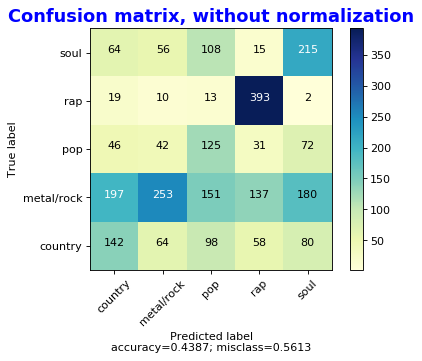

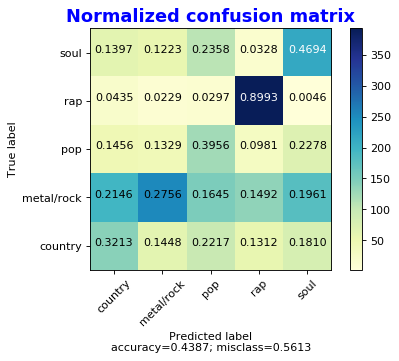

In [89]:
titles_options = [("Confusion matrix, without normalization", False),("Normalized confusion matrix", True)]
for title, normalize in titles_options:
    cnf_matrix_gnb = confusion_matrix(y_test, preds_gnb)
    disp = plot_confusion_matrix(cm=cnf_matrix_gnb, classes=lst_genre_type, title=title, cmap=plt.cm.YlGnBu,normalize=normalize)

In [90]:
with open('model/embedding/w2v/w2v_gnb.pickle', 'wb') as f:
    pickle.dump(text_gnb, f)

# w2v + Random Forest

In [91]:
embedding = 'w2v'
classifier = 'rf'
method = embedding + '+' + classifier
text_rf = RandomForestClassifier(max_depth=2, random_state=42)
text_rf.fit(X_train, y_train)
preds_rf = text_rf.predict(X_test)
print(preds_rf)

[2 2 4 ... 2 4 2]


In [92]:
cross_val_score_rf = cross_val_score(text_rf, X, y, cv=10)
print("Accuracy (%s): %0.4f (+/- %0.2f)" % (method, cross_val_score_rf.mean(), cross_val_score_rf.std() * 2))
rf_acc = metrics.accuracy_score(y_test, preds_rf)
print("Accuracy for " + method + ": " + str(rf_acc*100) + " %")

Accuracy (w2v+rf): 0.4309 (+/- 0.06)
Accuracy for w2v+rf: 44.224037339556595 %


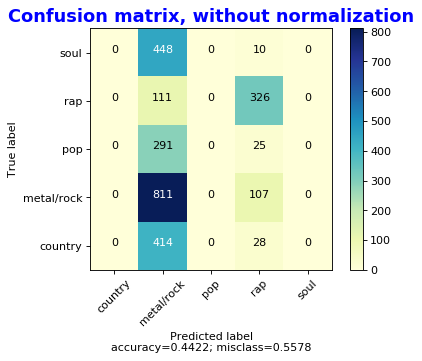

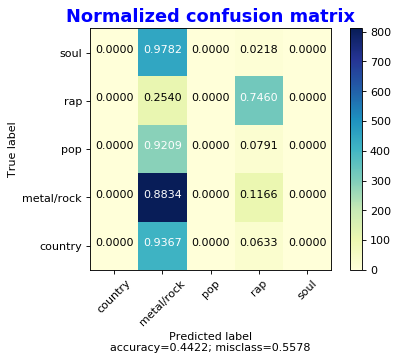

In [93]:
titles_options = [("Confusion matrix, without normalization", False),("Normalized confusion matrix", True)]
for title, normalize in titles_options:
    cnf_matrix_rf = confusion_matrix(y_test, preds_rf)
    disp = plot_confusion_matrix(cm=cnf_matrix_rf, classes=lst_genre_type, title=title, cmap=plt.cm.YlGnBu,normalize=normalize)

In [94]:
with open('model/embedding/w2v/w2v_rf.pickle', 'wb') as f:
    pickle.dump(text_rf, f)

# w2v + Support Vector Machine

In [95]:
embedding = 'w2v'
classifier = 'svm'
method = embedding + '+' + classifier
text_svm = svm.SVC(decision_function_shape='ovo')
#text_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=123)
text_svm.fit(X_train, y_train)
preds_svm = text_svm.predict(X_test)
print(preds_svm)

[2 2 4 ... 5 4 2]


In [96]:
cross_val_score_svm = cross_val_score(text_svm, X, y, cv=10)
print("Accuracy (%s): %0.4f (+/- %0.2f)" % (method, cross_val_score_svm.mean(), cross_val_score_svm.std() * 2))
svm_acc = metrics.accuracy_score(y_test, preds_svm)
print("Accuracy for " + method + ": " + str(svm_acc*100) + " %")

Accuracy (w2v+svm): 0.5059 (+/- 0.05)
Accuracy for w2v+svm: 51.4196810579541 %


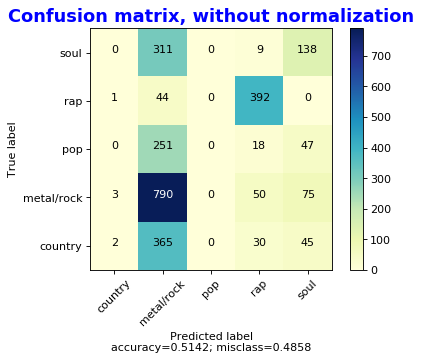

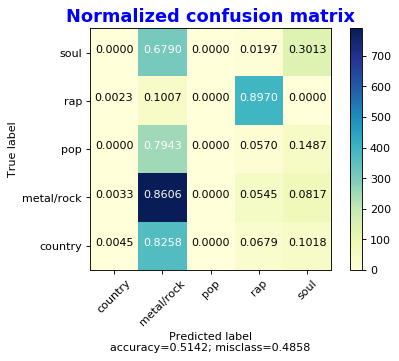

In [97]:
titles_options = [("Confusion matrix, without normalization", False),("Normalized confusion matrix", True)]
for title, normalize in titles_options:
    cnf_matrix_svm = confusion_matrix(y_test, preds_svm)
    disp = plot_confusion_matrix(cm=cnf_matrix_svm, classes=lst_genre_type, title=title, cmap=plt.cm.YlGnBu,normalize=normalize)

In [98]:
with open('model/embedding/w2v/w2v_svm.pickle', 'wb') as f:
    pickle.dump(text_svm, f)

# w2v + k-Nearest Neighbors

In [99]:
embedding = 'w2v'
classifier = 'knn'
method = embedding + '+' + classifier
text_knn = KNeighborsClassifier(n_neighbors=14)
text_knn.fit(X_train, y_train)
preds_knn = text_knn.predict(X_test)
print(preds_knn)

[3 2 4 ... 5 4 2]


In [100]:
cross_val_score_knn = cross_val_score(text_knn, X, y, cv=10)
print("Accuracy (%s): %0.4f (+/- %0.2f)" % (method, cross_val_score_knn.mean(), cross_val_score_knn.std() * 2))
knn_acc = metrics.accuracy_score(y_test, preds_knn)
print("Accuracy for " + method + ": " + str(knn_acc*100) + " %")

Accuracy (w2v+knn): 0.4169 (+/- 0.04)
Accuracy for w2v+knn: 43.25165305328666 %


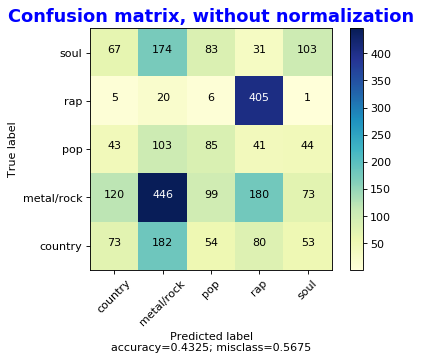

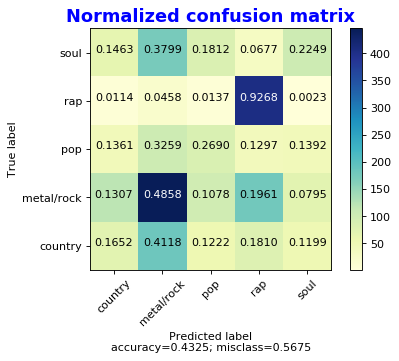

In [101]:
titles_options = [("Confusion matrix, without normalization", False),("Normalized confusion matrix", True)]
for title, normalize in titles_options:
    cnf_matrix_knn = confusion_matrix(y_test, preds_knn)
    disp = plot_confusion_matrix(cm=cnf_matrix_knn, classes=lst_genre_type, title=title, cmap=plt.cm.YlGnBu,normalize=normalize)

In [102]:
with open('model/embedding/w2v/w2v_knn.pickle', 'wb') as f:
    pickle.dump(text_knn, f)

# w2v + AdaBoost

In [103]:
embedding = 'w2v'
classifier = 'ada'
method = embedding + '+' + classifier
# text_ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.5,random_state=0)
text_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
text_ada.fit(X_train, y_train)
preds_ada = text_ada.predict(X_test)
print(preds_ada)

[2 2 4 ... 5 4 5]


In [104]:
cross_val_score_ada = cross_val_score(text_ada, X, y, cv=10)
print("Accuracy (%s): %0.4f (+/- %0.2f)" % (method, cross_val_score_ada.mean(), cross_val_score_ada.std() * 2))
ada_acc = metrics.accuracy_score(y_test, preds_ada)
print("Accuracy for " + method + ": " + str(ada_acc*100) + " %")

Accuracy (w2v+ada): 0.4617 (+/- 0.05)
Accuracy for w2v+ada: 46.28549202644886 %


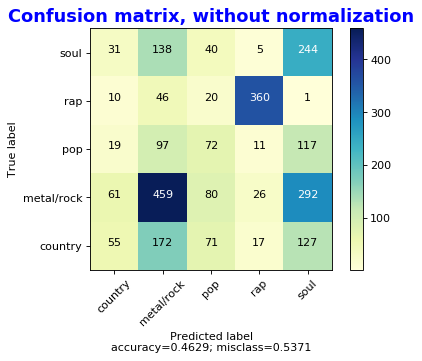

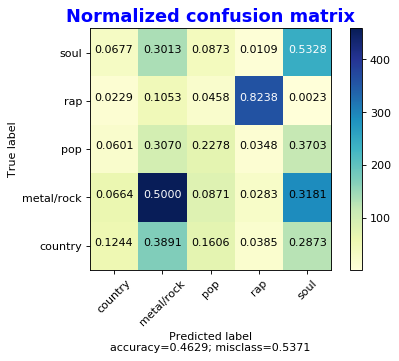

In [105]:
titles_options = [("Confusion matrix, without normalization", False),("Normalized confusion matrix", True)]
for title, normalize in titles_options:
    cnf_matrix_ada = confusion_matrix(y_test, preds_ada)
    disp = plot_confusion_matrix(cm=cnf_matrix_ada, classes=lst_genre_type, title=title, cmap=plt.cm.YlGnBu,normalize=normalize)

In [106]:
with open('model/embedding/w2v/w2v_ada.pickle', 'wb') as f:
    pickle.dump(text_ada, f)

# w2v + XGBoost

In [71]:
X_XGB = df_avg2.loc[:,['new_avg_vec']]
y_XGB = df_avg2.loc[:,['genre_index']]
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, y_XGB, test_size=0.3, random_state=0)

In [80]:
from sklearn import preprocessing
embedding = 'w2v'
classifier = 'xgb'
method = embedding + '+' + classifier
lbl = preprocessing.LabelEncoder()
X_train_XGB = lbl.fit_transform(X_train_XGB.astype(str)).reshape(1,-1)
X_test_XGB = lbl.fit_transform(X_test_XGB.astype(str)).reshape(1,-1)
y_train_XGB = (lbl.fit_transform(y_train_XGB.astype(str))).flatten()
y_test_XGB = (lbl.fit_transform(y_test_XGB.astype(str))).flatten()
text_xgb = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
text_xgb.fit(X_train_XGB, y_train_XGB)
preds_xgb = text_xgb.predict(X_test_XGB)
print(preds_xgb)

ValueError: y should be a 1d array, got an array of shape (1, 5998) instead.

In [ ]:
cross_val_score_xgb = cross_val_score(text_xgb, X, y, cv=10)
print("Accuracy (%s): %0.4f (+/- %0.2f)" % (method, cross_val_score_xgb.mean(), cross_val_score_xgb.std() * 2))
xgb_acc = metrics.accuracy_score(y_test, preds_xgb)
print("Accuracy for " + method + ": " + str(xgb_acc*100) + " %")

In [ ]:
titles_options = [("Confusion matrix, without normalization", False),("Normalized confusion matrix", True)]
for title, normalize in titles_options:
    cnf_matrix_xgb = confusion_matrix(y_test, preds_xgb)
    disp = plot_confusion_matrix(cm=cnf_matrix_xgb, classes=lst_genre_type, title=title, cmap=plt.cm.YlGnBu,normalize=normalize)

# w2v + NN

In [119]:
embedding = 'w2v'
classifier = 'nn'
method = embedding + '+' + classifier
text_nn = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate_init=0.001, power_t=0.5, max_iter=100)
text_nn.fit(X_train, y_train)
preds_nn = text_nn.predict(X_test)
print(preds_nn)

[2 2 4 ... 5 4 2]


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [121]:
cross_val_score_nn = cross_val_score(text_nn, X, y, cv=10)
print("Accuracy (%s): %0.4f (+/- %0.2f)" % (method, cross_val_score_nn.mean(), cross_val_score_nn.std() * 2))
nn_acc = metrics.accuracy_score(y_test, preds_nn)
print("Accuracy for " + method + ": " + str(nn_acc*100) + " %")

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

Accuracy (w2v+nn): 0.5504 (+/- 0.05)
Accuracy for w2v+nn: 55.231427460132245 %


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


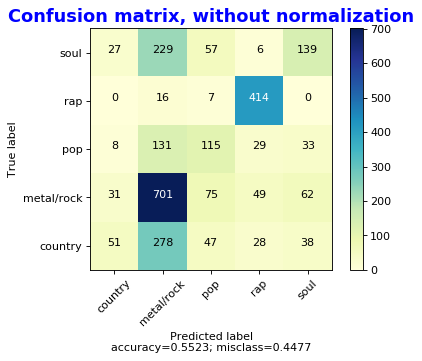

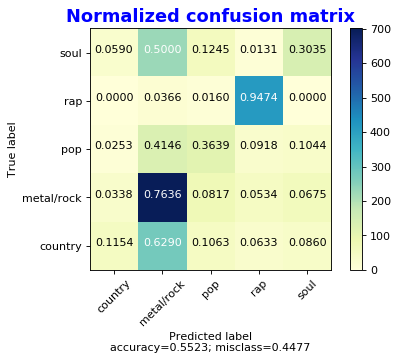

In [122]:
titles_options = [("Confusion matrix, without normalization", False),("Normalized confusion matrix", True)]
for title, normalize in titles_options:
    cnf_matrix_nn = confusion_matrix(y_test, preds_nn)
    disp = plot_confusion_matrix(cm=cnf_matrix_nn, classes=lst_genre_type, title=title, cmap=plt.cm.YlGnBu,normalize=normalize)

In [123]:
with open('model/embedding/w2v/w2v_nn.pickle', 'wb') as f:
    pickle.dump(text_nn, f)

# ---

In [ ]:
#訓練的X和y資料
#透過迴圈逐列把df_avg"new_avg_vec"欄位的資料放到X(list)
#透過迴圈逐列把df"genre"欄位的資料放到y(list)
#iterrows()會回傳該列的索引(index)和所有資料(data)，可以指定使用data的哪一個欄位
X_train = []
y_train = []
for index, data in df_avg.iterrows():
    X_train.append(data['new_avg_vec'])
for index, data in df.iterrows():
    y_train.append(data['genre'])

#一般可以用list或np.array輸入進行分類，上面的list速度慢，轉成np.array()速度比較快
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
#測試的X和y資料
#透過迴圈逐列把df_avg"new_avg_vec"欄位的資料放到X(list)
#透過迴圈逐列把df"genre"欄位的資料放到y(list)
#iterrows()會回傳該列的索引(index)和所有資料(data)，可以指定使用data的哪一個欄位
X_test = []
y_test = []
for index, data in df_avg.iterrows():
    X_test.append(data['new_avg_vec'])
for index, data in df.iterrows():
    y_test.append(data['genre'])

#一般可以用list或np.array輸入進行分類，上面的list速度慢，轉成np.array()速度比較快
X_test = np.array(X_test)
y_test = np.array(y_test)

In [22]:
model = gensim.models.KeyedVectors.load_word2vec_format('model/embedding/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin',binary=True)

In [23]:
dog = model['dog']
print(dog)
print(dog.shape)
print(dog[:10])

[ 5.12695312e-02 -2.23388672e-02 -1.72851562e-01  1.61132812e-01
 -8.44726562e-02  5.73730469e-02  5.85937500e-02 -8.25195312e-02
 -1.53808594e-02 -6.34765625e-02  1.79687500e-01 -4.23828125e-01
 -2.25830078e-02 -1.66015625e-01 -2.51464844e-02  1.07421875e-01
 -1.99218750e-01  1.59179688e-01 -1.87500000e-01 -1.20117188e-01
  1.55273438e-01 -9.91210938e-02  1.42578125e-01 -1.64062500e-01
 -8.93554688e-02  2.00195312e-01 -1.49414062e-01  3.20312500e-01
  3.28125000e-01  2.44140625e-02 -9.71679688e-02 -8.20312500e-02
 -3.63769531e-02 -8.59375000e-02 -9.86328125e-02  7.78198242e-03
 -1.34277344e-02  5.27343750e-02  1.48437500e-01  3.33984375e-01
  1.66015625e-02 -2.12890625e-01 -1.50756836e-02  5.24902344e-02
 -1.07421875e-01 -8.88671875e-02  2.49023438e-01 -7.03125000e-02
 -1.59912109e-02  7.56835938e-02 -7.03125000e-02  1.19140625e-01
  2.29492188e-01  1.41601562e-02  1.15234375e-01  7.50732422e-03
  2.75390625e-01 -2.44140625e-01  2.96875000e-01  3.49121094e-02
  2.42187500e-01  1.35742

In [24]:
# Deal with an out of dictionary word: Михаил (Michail)
if 'Михаил' in model:
    print(model['Михаил'].shape)
else:
    print('{0} is an out of dictionary word'.format('Михаил'))

# Some predefined functions that show content related information for given words
#print(model.most_similar(positive=['woman', 'king'], negative=['man']))
#print(model.doesnt_match("breakfast cereal dinner lunch".split()))
#print(model.similarity('woman', 'man'))

Михаил is an out of dictionary word


In [10]:
sentences = [['this', 'is', 'a', 'cat'], ['cats', 'love', 'eating', 'fish']]
# train model
model1 = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model1)

Word2Vec(vocab=8, size=100, alpha=0.025)


In [11]:
# summarize vocabulary
words = list(model1.wv.vocab)
print(words)

# access vector for one word
print(model1['cat'])

['this', 'is', 'a', 'cat', 'cats', 'love', 'eating', 'fish']
[ 1.8254671e-03  2.7532408e-03 -2.7716772e-03 -6.0062105e-04
 -4.6654362e-03  3.2379674e-03 -2.6274901e-03  2.5206539e-03
 -1.3037039e-03 -1.3359862e-03  2.7712695e-03 -2.2016615e-03
 -4.9594110e-03  4.4110194e-03  2.3235332e-03 -1.5266249e-03
  1.4535311e-03  1.5389052e-03  1.3222696e-03  4.7761606e-04
  3.5450561e-03  1.9976955e-03  5.7927810e-04  4.5032610e-04
 -2.2600451e-03 -1.5886807e-03  4.4692666e-03 -3.5980607e-03
  2.3753813e-03  4.9683522e-03  3.2685438e-04 -2.5574290e-03
  3.9594779e-03 -1.6369752e-03 -4.5139669e-03  2.8820618e-03
 -6.0317456e-04 -7.9149555e-05 -3.7582514e-03 -3.4175508e-03
 -1.9097034e-03 -2.1045879e-03  3.0695999e-03  2.1485267e-03
  2.5853398e-03 -9.2849170e-04 -4.7746226e-03 -3.4407403e-03
  4.9887486e-03  1.6402060e-03  2.1873212e-03  2.6242386e-03
  3.9068698e-03  2.5965343e-03 -1.4550890e-03 -2.3972911e-04
 -1.1372720e-03  2.5927750e-03 -3.0549022e-03 -4.2767241e-03
 -2.9356635e-04  3.54237

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [12]:
# save model
model1.save('model/embedding/model_w2v.bin')